# Time Series Classification

Welcome to Lab 7 of the **Python for Data Science** course! In this lab, we will explore time series classification techniques. We will use synthetic time series data to demonstrate how to classify sequences and evaluate model performance.

---

## 1. Introduction to Time Series Classification

Time series classification involves categorizing sequences of data over time. It's widely used in applications such as speech recognition, financial forecasting, and medical diagnostics.

---

## 2. Generating Synthetic Time Series Data

We'll start by creating synthetic time series data with two different classes. This data will serve as our input for classification tasks.

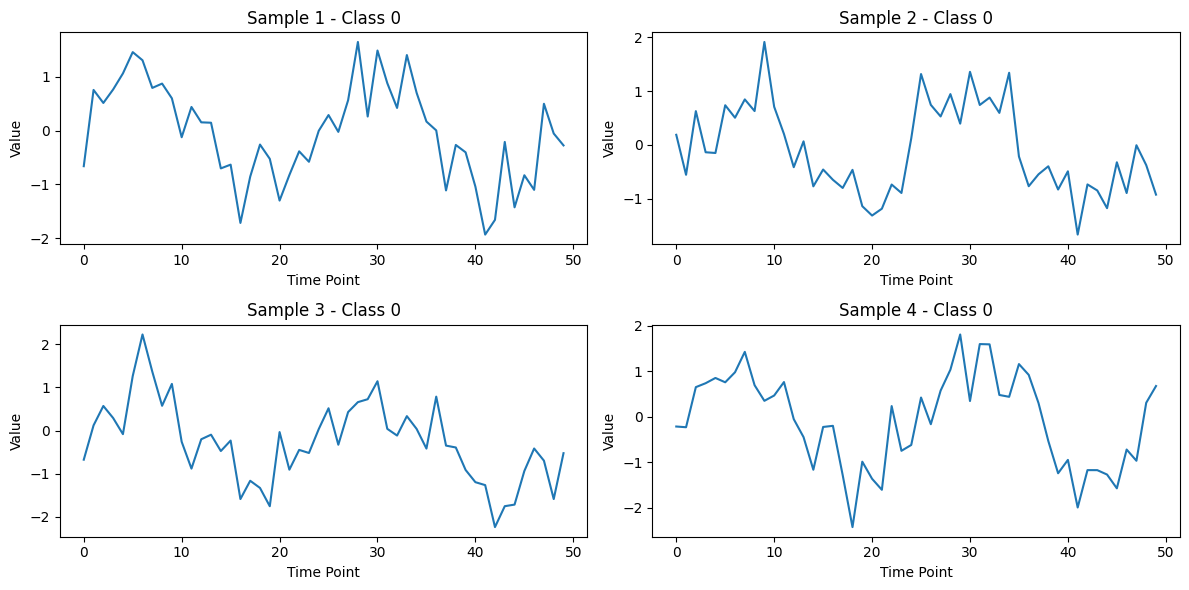

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for synthetic time series data
n_samples = 1000
n_time_points = 50
n_classes = 2

# Generate synthetic time series data
def generate_time_series(n_samples, n_time_points, n_classes):
    X = np.zeros((n_samples, n_time_points))
    y = np.zeros(n_samples)
    for i in range(n_samples):
        if i < n_samples // 2:
            # Class 0: Sinusoidal pattern
            X[i] = np.sin(np.linspace(0, 4 * np.pi, n_time_points)) + 0.5 * np.random.randn(n_time_points)
            y[i] = 0
        else:
            # Class 1: Square wave pattern
            X[i] = np.sign(np.sin(np.linspace(0, 4 * np.pi, n_time_points))) + 0.5 * np.random.randn(n_time_points)
            y[i] = 1
    return X, y

# Generate the synthetic data
X, y = generate_time_series(n_samples, n_time_points, n_classes)

# Plot a few samples
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(X[i])
    plt.title(f"Sample {i + 1} - Class {int(y[i])}")
    plt.xlabel('Time Point')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

---

## 3. Preparing Data for Classification

We'll split the synthetic time series data into training and testing sets and then preprocess it for classification.

### 3.1. Splitting the Data

We'll split the data into training and testing sets.



In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (700, 50)
Testing data shape: (300, 50)


### 3.2. Preprocessing Data

We may need to preprocess the time series data before feeding it into machine learning models. In this case, we'll normalize the data.



In [11]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train = np.array([scaler.fit_transform(x.reshape(-1, 1)).flatten() for x in X_train])
X_test = np.array([scaler.transform(x.reshape(-1, 1)).flatten() for x in X_test])

print("Normalized training data shape:", X_train.shape)
print("Normalized testing data shape:", X_test.shape)


Normalized training data shape: (700, 50)
Normalized testing data shape: (300, 50)


---

## 4. Building and Training a Classification Model

We will build a simple machine learning model for classifying the time series data. A common approach is to use a model like Random Forest or an LSTM network. We'll start with a Random Forest classifier.

### 4.1. Building the Random Forest Model



In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest Classifier Accuracy:", accuracy)
print("Classification Report:\n", report)


Random Forest Classifier Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       150
         1.0       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



### 4.2. Evaluating Model Performance

We evaluated the Random Forest model on the test set and obtained the accuracy and classification report. This provides insights into how well the model performs on unseen data.

---

## 5. Advanced Classification with LSTM

Long Short-Term Memory (LSTM) networks are a type of Recurrent Neural Network (RNN) well-suited for time series classification. We'll build and train an LSTM model for comparison.

### 5.1. Building the LSTM Model



In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(n_time_points, 1)),
    Dropout(0.2),
    LSTM(100, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(n_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/Users/markshteyn/Library/Caches/pypoetry/virtualenvs/neurotech-curriculum-GDeaBtn4-py3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,352 (493.56 KB)

 Trainable params: 126,352 (493.56 KB)

 Non-trainable params: 0 (0.00 B)

### 5.2. Training the LSTM Model

We'll train the LSTM model on the synthetic time series data.



In [15]:
# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], n_time_points, 1))
X_test_lstm = X_test.reshape((X_test.shape[0], n_time_points, 1))

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_lstm, y_test)
print("LSTM Model Test Accuracy:", test_acc)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5174 - loss: 0.6921 - val_accuracy: 0.4357 - val_loss: 0.6937
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 914ms/step - accuracy: 0.5101 - loss: 0.6860 - val_accuracy: 0.4357 - val_loss: 0.6889
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 957ms/step - accuracy: 0.5588 - loss: 0.6710 - val_accuracy: 0.7357 - val_loss: 0.6641
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 957ms/step - accuracy: 0.6975 - loss: 0.6428 - val_accuracy: 0.7643 - val_loss: 0.5853
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6983 - loss: 0.6010 - val_accuracy: 0.8357 - val_loss: 0.5994
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 921ms/step - accuracy: 0.8377 - loss: 0.5853 - val_accuracy: 0.6286 - val_loss: 0.6191
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 889ms/step - accuracy: 0.7187 - loss: 0.5645 - val_accuracy: 0.8500 - val_loss: 0.5008
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 842ms/step - accuracy: 0.8462 - loss: 0.4550 - val_accuracy: 0.7786 - val_loss: 0.4

### 5.3. Visualizing Training Performance

Let's plot the training and validation accuracy and loss for the LSTM model.



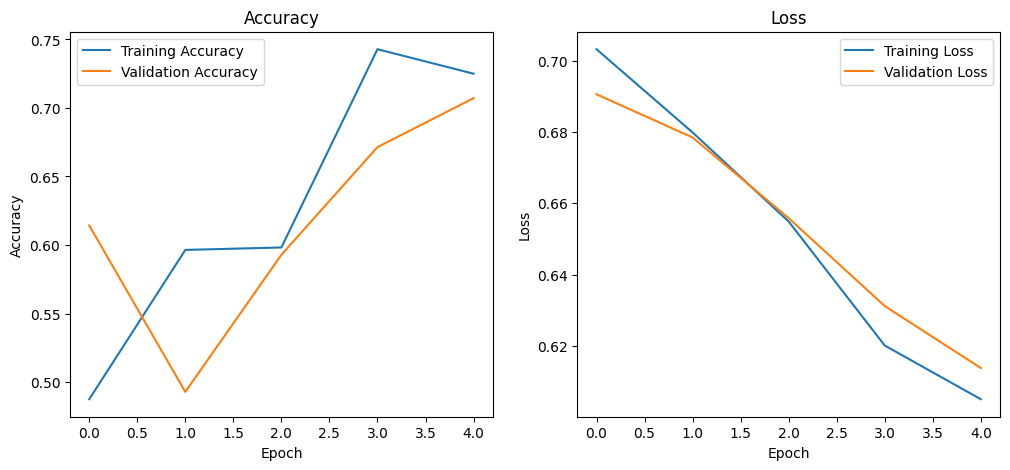

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

---

## 6. Summary and Next Steps

In this lab, we explored time series classification techniques using synthetic data. We built and evaluated both a Random Forest classifier and an LSTM model.

### Next Steps:

- Experiment with different models and hyperparameters for time series classification.
- Apply these techniques to real time series data in domains such as finance or healthcare.
- Explore more advanced methods, such as attention mechanisms and hybrid models.

Keep practicing and applying these techniques to enhance your skills in time series classification!

---
